In [291]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [292]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [293]:
nRow, nCol = train_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 45528 rows and 19 columns


In [294]:
nRow, nCol = test_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 11383 rows and 18 columns


In [295]:
train_df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [296]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45528.0,38.993411,9.543990,23.00,31.000,39.000,47.0000,5.500000e+01
no_of_children,44754.0,0.420655,0.724097,0.00,0.000,0.000,1.0000,9.000000e+00
net_yearly_income,45528.0,200655.622249,669074.034607,27170.61,126345.835,171714.910,240603.7600,1.407590e+08
no_of_days_employed,45065.0,67609.289293,139323.524434,2.00,936.000,2224.000,5817.0000,3.652520e+05
total_family_members,45445.0,2.158081,0.911572,1.00,2.000,2.000,3.0000,1.000000e+01
migrant_worker,45441.0,0.179111,0.383450,0.00,0.000,0.000,0.0000,1.000000e+00
yearly_debt_payments,45433.0,31796.965311,17269.727234,2237.47,19231.140,29081.650,40561.1500,3.281129e+05
credit_limit,45528.0,43548.416028,148784.686878,4003.14,23973.805,35688.045,53435.7625,3.112997e+07
credit_limit_used(%),45528.0,52.235020,29.376910,0.00,27.000,54.000,78.0000,9.900000e+01
credit_score,45520.0,782.791257,100.619746,500.00,704.000,786.000,867.0000,9.490000e+02


In [297]:
#we can see that out of 19,  12 columns have 45528.0 count which indicates there is no missing value.


In [298]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [299]:
train_df.isna().sum()    # check for missing values for surity

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [300]:
#6 missing value hence  imputation is required,

In [301]:
def cleanTheData(pd_original_data):
    pd_data_Cleaning=pd_original_data

    #Credit Score Cleaining
    pd_data_Cleaning['credit_score'].fillna(pd_data_Cleaning['credit_score'].mean(),inplace=True)
    
    #owns_car
    pd_data_Cleaning['owns_car'].fillna( 'N',inplace=True)

    #no_of_children
    pd_data_Cleaning['no_of_children'].fillna( 0.0,inplace=True)
    
    #total_family_members
    pd_data_Cleaning['total_family_members'].fillna(pd_data_Cleaning['yearly_debt_payments'].mean(),inplace=True)

    #migrant_worker
    pd_data_Cleaning['migrant_worker'].fillna( pd_data_Cleaning['yearly_debt_payments'].mean(),inplace=True)
    
    #Cleaining no_of_days_employed
    mode=pd_data_Cleaning['no_of_days_employed'].mode()
    pd_data_Cleaning['no_of_days_employed']=pd_data_Cleaning['no_of_days_employed'].fillna(10)

    #Yearly Debt Cleaning
    convert_dict = {'yearly_debt_payments': float} 
    pd_data_Cleaning["yearly_debt_payments"].replace('[^0-9.]',"",regex=True,inplace=True )
    pd_data_Cleaning["yearly_debt_payments"].fillna(pd_data_Cleaning['yearly_debt_payments'].mean(),inplace=True)
    
    return pd_data_Cleaning

In [302]:
train_df = cleanTheData(train_df)
test_df = cleanTheData(test_df)

In [303]:
train_df.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [304]:
#before moving to visualization we first select some features which we feel would be most correlated to the target variable.
# From the data provided we see that we want to predict whether a person will default in payment next month or not. 
#This prediction depends mostly on previous repayment history, what is the credit_score, age, gender and occupation_type. 
#Let's plot these first.

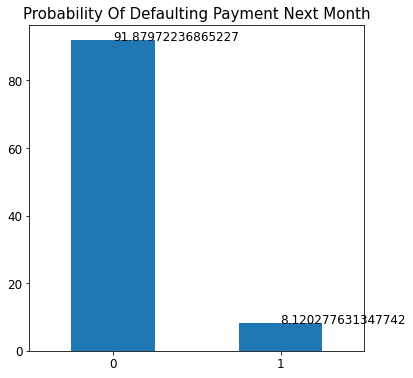

In [305]:
def_cnt = (train_df.credit_card_default.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()


In [306]:
#We can see that the dataset consists of 91.8% clients are not expected to default payment whereas 8% clients are expected to default the payment.

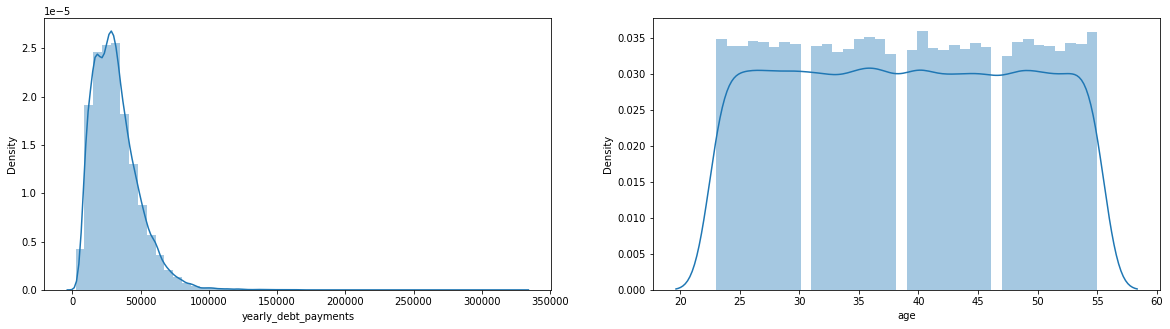

In [307]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(train_df.yearly_debt_payments)

plt.subplot(122)
sns.distplot(train_df.age)

plt.show()

In [308]:
#We have more number of clients from age bracket of 22 to 55, i.e., clients from mostly young to mid aged groups.
#We will observe the effect of variables on target variable below

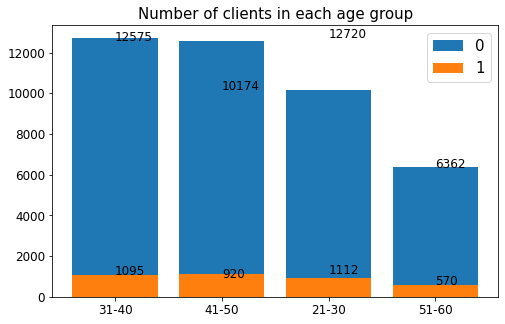

In [309]:
bins = [20,30,40,50,60]
names = ['21-30','31-40','41-50','51-60']
train_df['AGE_BIN'] = pd.cut(x=train_df.age, bins=bins, labels=names, right=True)

age_cnt = train_df.AGE_BIN.value_counts()
age_0 = (train_df.AGE_BIN[train_df['credit_card_default'] == 0].value_counts())
age_1 = (train_df.AGE_BIN[train_df['credit_card_default'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [310]:
#We have maximum clients from 31-40 age group followed by 41-50.
# Hence with increasing age group the number of clients that will default the payment next month is decreasing. 
#Hence we can see that Age is important feature to predict the default payment for next month.

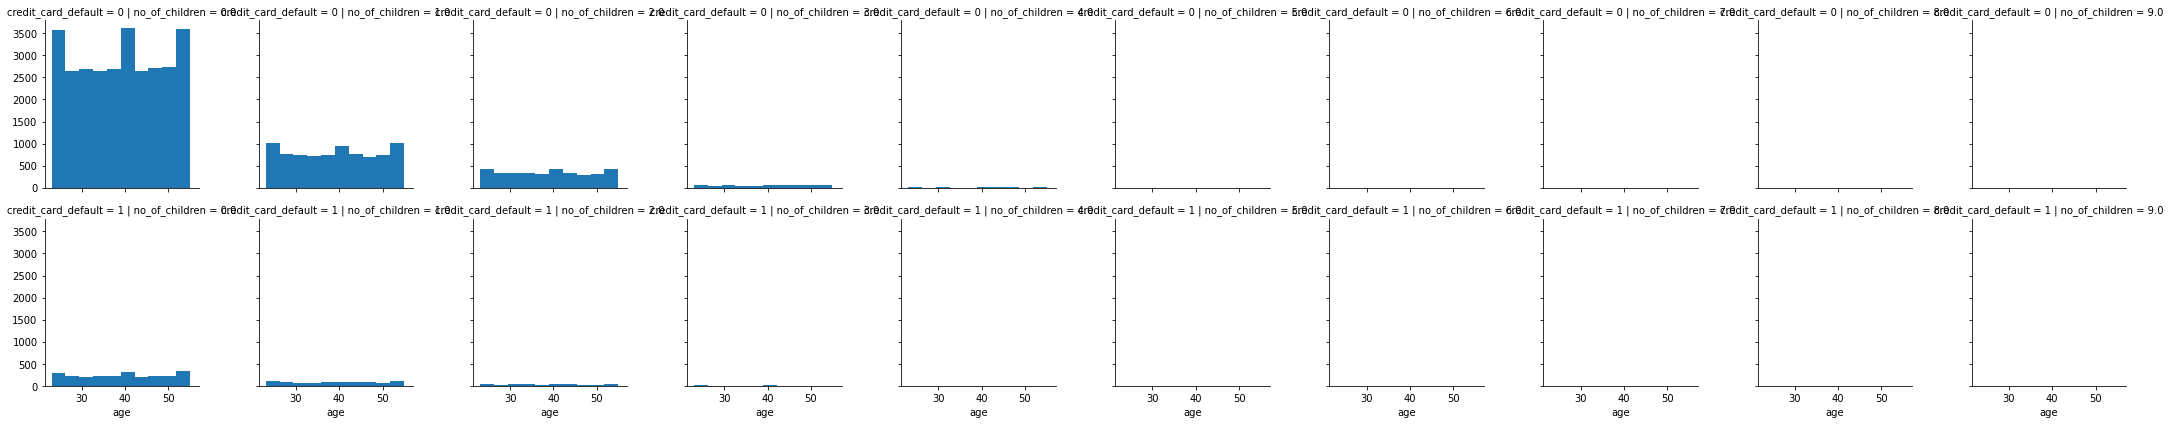

In [311]:
g = sns.FacetGrid(train_df, row='credit_card_default', col='no_of_children')
g = g.map(plt.hist, 'age')
plt.show()

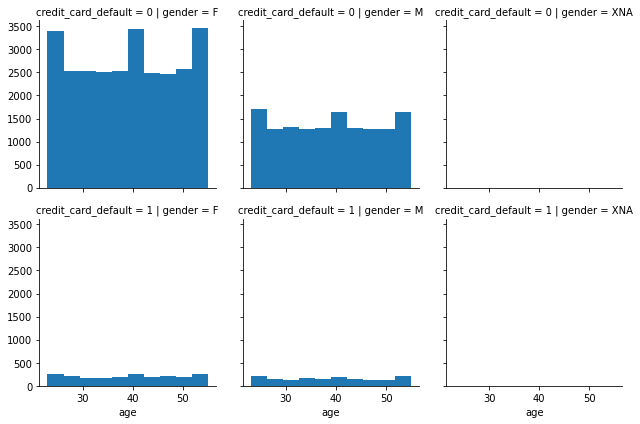

In [312]:
g = sns.FacetGrid(train_df, row='credit_card_default', col='gender')
g = g.map(plt.hist, 'age')


In [313]:
#It can be seen that females of all age group have very high tendency to default payment compared to males in all age brackets. 
#Hence we can keep the SEX column of clients to predict probability of defaulting payment.

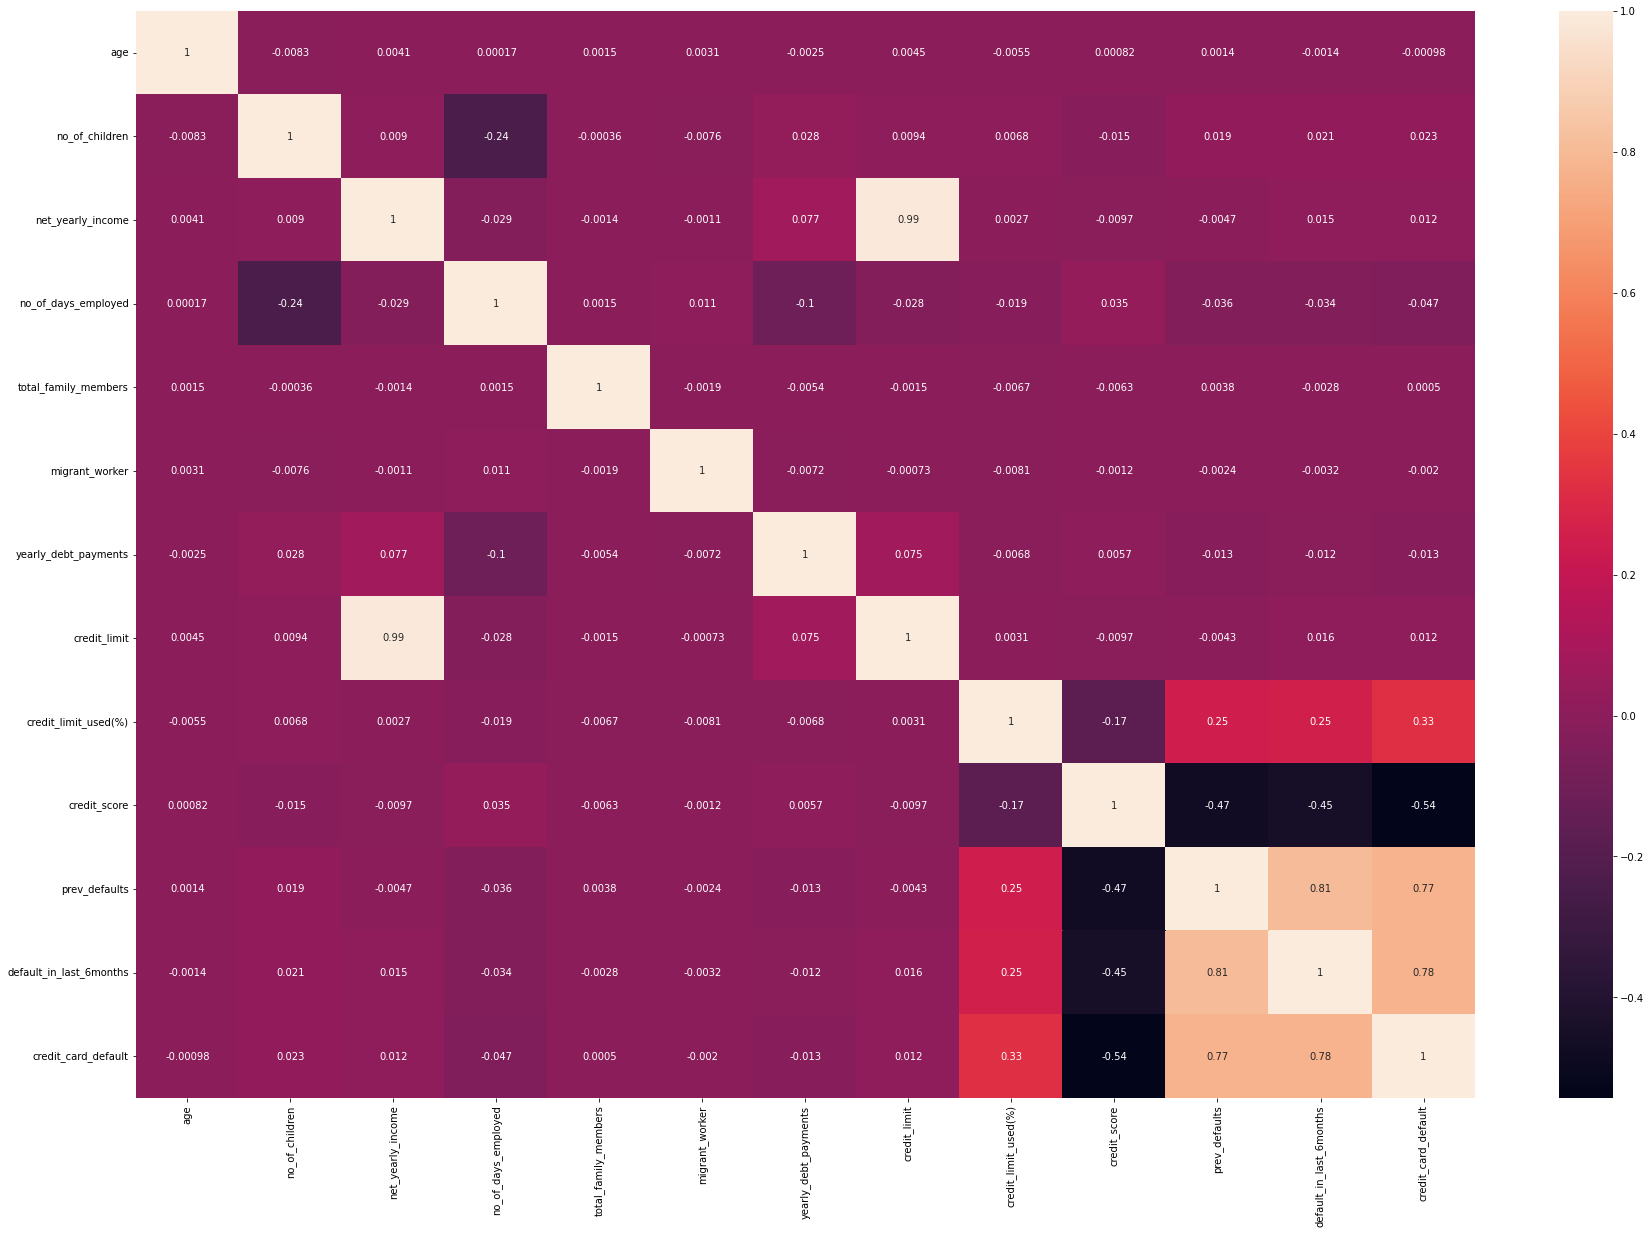

In [314]:
plt.subplots(figsize=(30,20))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [315]:
#as we can see that next month default prediction is dependent on credit score, followed by previous defaults , previos 6 months defaults.


In [316]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customer_id              45528 non-null  object  
 1   name                     45528 non-null  object  
 2   age                      45528 non-null  int64   
 3   gender                   45528 non-null  object  
 4   owns_car                 45528 non-null  object  
 5   owns_house               45528 non-null  object  
 6   no_of_children           45528 non-null  float64 
 7   net_yearly_income        45528 non-null  float64 
 8   no_of_days_employed      45528 non-null  float64 
 9   occupation_type          45528 non-null  object  
 10  total_family_members     45528 non-null  float64 
 11  migrant_worker           45528 non-null  float64 
 12  yearly_debt_payments     45528 non-null  float64 
 13  credit_limit             45528 non-null  float64 
 14  credit

In [317]:
train_df.select_dtypes("object_")

,customer_id,name,gender,owns_car,owns_house,occupation_type
0,CST_115179,ita Bose,F,N,Y,Unknown
1,CST_121920,Alper Jonathan,M,N,Y,Laborers
2,CST_109330,Umesh Desai,M,N,Y,Laborers
3,CST_128288,Rie,F,N,Y,Core staff
4,CST_151355,McCool,M,Y,Y,Core staff
...,...,...,...,...,...,...
45523,CST_130421,Doris,F,N,N,Unknown
45524,CST_136670,Luciana,F,N,Y,Accountants
45525,CST_145435,Jessica,F,N,Y,Core staff
45526,CST_130913,Tessa,M,Y,N,Laborers


In [318]:
train_df['occupation_type'].value_counts()

Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64

In [319]:
train_df['gender'].value_counts()

F      29957
M      15570
XNA        1
Name: gender, dtype: int64

In [320]:
train_df['owns_car'].value_counts()

N    30290
Y    15238
Name: owns_car, dtype: int64

In [321]:
train_df['owns_house'].value_counts()

Y    31642
N    13886
Name: owns_house, dtype: int64

In [322]:
float_columns = train_df.select_dtypes("float64").columns

In [323]:
from sklearn.preprocessing import MinMaxScaler

In [324]:
scale = MinMaxScaler()
train_df[float_columns] = pd.DataFrame(scale.fit_transform( train_df[float_columns]),columns =  float_columns)
float_columns

Index(['no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_score'],
      dtype='object')

In [325]:
test_df[float_columns] = pd.DataFrame(scale.fit_transform( test_df[float_columns]),columns =  float_columns)

In [326]:
#We will first train model wil all the features and try reducing the non-important features.

In [327]:
df_X = train_df.drop(['credit_card_default','AGE_BIN','customer_id', 'name'], axis=1)
df_y = train_df.credit_card_default

In [328]:
#Using one hot encoding for object data types
df_X = pd.get_dummies(df_X,drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8516
           1       0.78      0.96      0.86       590

    accuracy                           0.98      9106
   macro avg       0.89      0.97      0.93      9106
weighted avg       0.98      0.98      0.98      9106

[[8357  159]
 [  21  569]]

Accuracy Score for model1:  0.980232813529541


In [329]:
test_X = test_df.drop(['customer_id', 'name'], axis=1)
test_X = pd.get_dummies(test_X,drop_first=True)

In [330]:
y_pred_result = model1.predict(test_X)

In [342]:
test_df["y_pred_result"] = y_pred_result

In [347]:
result = test_df[["customer_id", "y_pred_result"]]

In [360]:
result.columns = ["customer_id", "credit_card_default"]

In [361]:
result.to_csv('result.csv', index= False)